In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Compute $\int_{0}^{1} x^2 dx$

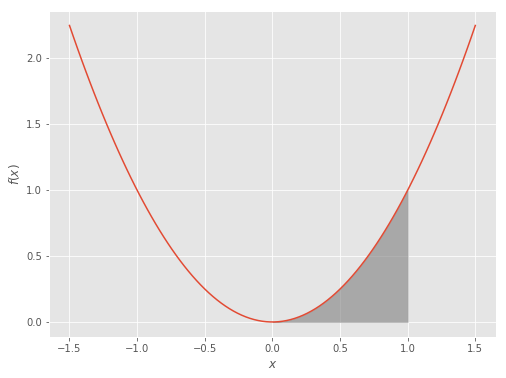

In [232]:
f = lambda x: x**2
a = 0
b = 1

xn = np.linspace(-1.5, 1.5, 100)
plt.figure(figsize=(8, 6))
x_interval = np.linspace(a, b, 100)
plt.plot(xn, f(xn))
plt.fill_between(x_interval, 0, f(x_interval), color='gray', alpha=0.6)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

## Newton-Cotes Quadrature

### Closed Rules

In [250]:
n = 5
x_int = np.arange(a, b + (b - a)/(n - 1), (b - a) / (n - 1))

#### Trapezoidal rule

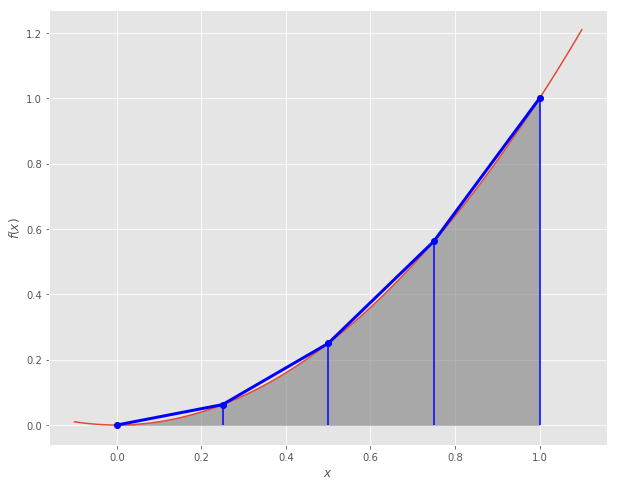

In [251]:
xn = np.linspace(-0.1, 1.1, 100)
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn))
plt.fill_between(x_interval, 0, f(x_interval), color='gray', alpha=0.6)
plt.plot(x_int, f(x_int), 'bo-', lw=3)
plt.vlines(x_int, 0, f(x_int), 'b')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

In [268]:
def trapz_rule(f, a, b, n):
    delta_x = (b - a) / (n - 1)
    s = 0
    for i in range(1, len(x_int)-1):
        s += f(x_int[i])
    trapz_int = (s + 0.5*f(x_int[0]) + 0.5*f(x_int[-1])) * delta_x
    return trapz_int

In [273]:
trapz_rule(f, a, b, n)

In [209]:
np.trapz(f(x_int), x_int)

#### Simpson's rule

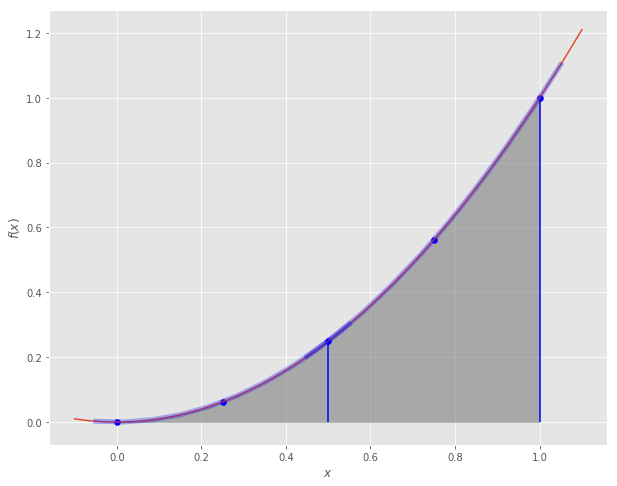

In [222]:
y = f(x_int)
Betas = []
for i in range(int((n+1) / 3)):
    Xi = []
    yi = []
    for j in range(3):
        Xj = np.array([x_int[2*i + j]**2, x_int[2*i + j], 1])
        Xi.append(Xj)
        yj = y[2*i + j]
        yi.append(yj)
    Xi = np.array(Xi)
    yi = np.array(yi)
    Betai = np.linalg.inv(Xi.T @ Xi) @ Xi.T @ yi
    Betas.append(Betai)
    
xn = np.linspace(-0.1, 1.1, 100)
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn))
plt.fill_between(x_interval, 0, f(x_interval), color='gray', alpha=0.6)

for i in range(int((n+1) / 3)):
    x_int_i = np.linspace(x_int[2*i] - 0.05, x_int[2*i+2] + 0.05, 10)
    y_int_i = np.c_[x_int_i**2, x_int_i, np.ones(10)] @ Betas[i]
    plt.plot(x_int_i, y_int_i, 'b', lw=5, alpha=0.3)
    plt.vlines(x_int[2*i+2], 0, f(x_int[2*i+2]), color='b')

plt.scatter(x_int, f(x_int), color='b')    
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

In [270]:
def simps_rule(f, a, b, n):
    delta_x = (b - a) / (n - 1)
    s = 0
    for i in range(1, len(x_int)-1):
        if i % 2 != 0:
            fx = 4 * f(x_int[i])
        else:
            fx = 2 * f(x_int[i])
        s += fx
    s += f(x_int[0]) + f(x_int[-1])
    simps_int = s * (delta_x / 6.0)*2
    return simps_int

In [272]:
simps_rule(f, a, b, n)

In [207]:
from scipy.integrate import simps

simps(f(x_int), x_int)

### Open Rules 

#### Midpoint rule

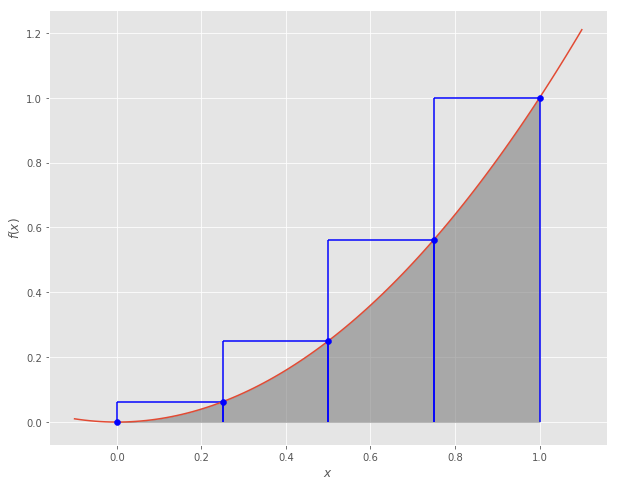

In [244]:
xn = np.linspace(-0.1, 1.1, 100)
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn))
plt.fill_between(x_interval, 0, f(x_interval), color='gray', alpha=0.6)
plt.vlines(x_int, 0, f(x_int), 'b')
for i in range(1, len(x_int)):
    plt.hlines(f(x_int[i]), x_int[i-1], x_int[i], 'b')
    plt.vlines(x_int[i-1], 0, f(x_int[i]), 'b')
plt.scatter(x_int, f(x_int), color='b', zorder=5)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

In [246]:
def midpoint(f, a, b, n):
    h = float(b - a) / n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

In [274]:
midpoint(f, a, b, n)

## Using `Sympy`

In [77]:
import sympy
sympy.init_printing()

In [78]:
x = sympy.Symbol('x')
fx = x**2

In [79]:
sympy.integrate(fx, (x, 0, 1))

In [80]:
f_int = sympy.integrate(fx, x)
f_int

In [81]:
f_int.subs(x, 1) - f_int.subs(x, 0)